In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy as sp
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns
from anndata import AnnData
from anndata import read_h5ad
import os
import time
from gprofiler import GProfiler

# scTRS tools
import scTRS.util as util
import scTRS.data_loader as dl
import scTRS.method as md

# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# # Read data 
# DATA_PATH='/n/holystore01/LABS/price_lab/Users/mjzhang/scTRS_data/single_cell_data/tcell_canogamez_nc_2020'

# # Reformat features.tsv.gz to be consistent with read_10x_mtx
# df_gene = pd.read_csv(DATA_PATH+'/NCOMMS-19-7936188_scRNAseq_genes.tsv', header=None)
# df_gene[1] = 'Gene Expression'
# df_gene.to_csv(DATA_PATH+'/format_10x/features.tsv.gz', header=False, sep='\t', compression='gzip')

# df_cell = pd.read_csv(DATA_PATH+'/NCOMMS-19-7936188_scRNAseq_barcodes.tsv', header=None)
# df_meta = pd.read_csv(DATA_PATH+'/NCOMMS-19-7936188_metadata.txt', sep='\t')

# # Read and write the raw data 
# adata = sc.read_10x_mtx(DATA_PATH+'/format_10x')
# adata.obs = adata.obs.join(df_meta)
# adata.write(DATA_PATH+'/obj_raw.h5ad')

In [3]:
DATA_PATH='/n/holystore01/LABS/price_lab/Users/mjzhang/scTRS_data/single_cell_data/tcell_canogamez_nc_2020'
adata_raw=read_h5ad(DATA_PATH+'/obj_raw.h5ad')

In [9]:
# .cov file
adata_raw.obs['n_genes'] = (adata_raw.X>0).sum(axis=1)
df_cov = pd.DataFrame(index=adata_raw.obs_names)
df_cov['index'] = df_cov.index
df_cov['const'] = 1
df_cov['n_genes'] = adata_raw.obs['n_genes']
df_cov.to_csv('/n/holystore01/LABS/price_lab/Users/mjzhang/scTRS_data/single_cell_data/tcell_canogamez_nc_2020'
              '/tcell_canogamez.cov', index=False, sep='\t')

In [7]:
df_cov

,const,n_genes
N_resting_AAACCTGAGCTGTCTA,1,1162
N_resting_AAACCTGTCACCACCT,1,1037
N_resting_AAACCTGTCCGTTGTC,1,1243
N_resting_AAACGGGAGGGTTCCC,1,1013
N_resting_AAACGGGCAACAACCT,1,1005
...,...,...
M_iTreg_r2_TTTGCGCGTGATAAGT,1,3491
M_iTreg_r2_TTTGGTTCATGATCCA,1,4520
M_iTreg_r2_TTTGGTTTCCTGTACC,1,3379
M_iTreg_r2_TTTGGTTTCGGCTTGG,1,3688


In [4]:
# Cluster the data to have UMAP plot 
adata = adata_raw.copy()
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
print(adata.shape)

sc.pp.highly_variable_genes(adata, subset = False, min_disp=.5, 
                            min_mean=.0125, max_mean=10, n_bins=20, n_top_genes=None)
sc.pp.scale(adata, max_value=10, zero_center=False)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)
sc.tl.louvain(adata, resolution = 0.5)
sc.tl.leiden(adata, resolution = 0.5)
sc.tl.umap(adata)
sc.tl.diffmap(adata)
# sc.tl.draw_graph(adata)
adata.write(DATA_PATH+'/obj_processed.h5ad')

(43112, 20953)


/n/holystore01/LABS/price_lab/Users/mjzhang/myenv_gf/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


In [14]:
'CTLA4' in adata.var_names

True

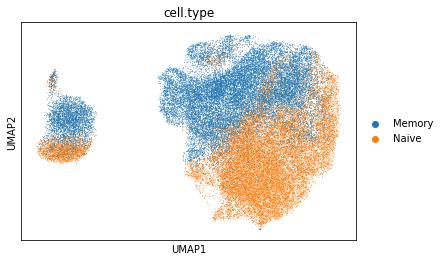

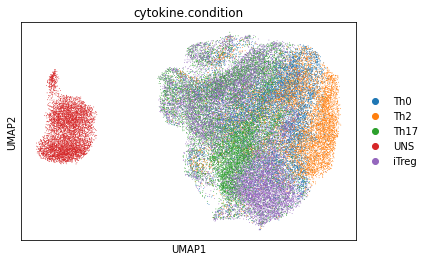

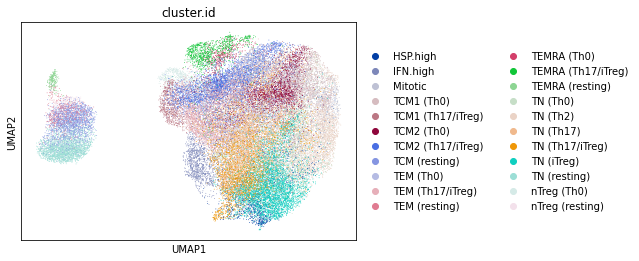

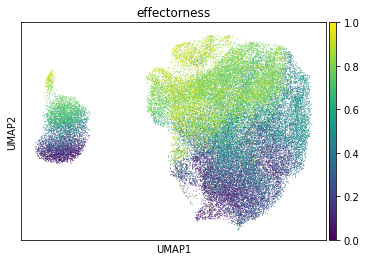

In [11]:
sc.pl.umap(adata, color='cell.type')
sc.pl.umap(adata, color='cytokine.condition')
sc.pl.umap(adata, color='cluster.id')
sc.pl.umap(adata, color='effectorness')

In [8]:
adata.obsm['X_umap']

array([[-2.062934  , -0.67036855],
       [-1.7061074 , -0.9555854 ],
       [-2.1058404 , -0.9585239 ],
       ...,
       [ 7.9286537 ,  1.2297388 ],
       [ 7.779099  ,  0.79536253],
       [ 8.201949  ,  2.111014  ]], dtype=float32)